# Survey analysis

## 1) Load the dataset into a pandas dataframe. Name the variable as "survey".

In [2]:
import pandas as pd

survey=pd.read_csv('Survey Dataset.csv')

survey.head(10)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
5,6,5-24-2017,Urban,Graduate,"₹ 20,000 - ₹ 30,000",Others,BJP,Somewhat Satisfied,Fully Dissatisfied,38,Male,178,Gen,0.382603
6,7,5-24-2017,Urban,Graduate,"BPL/Below ₹ 5,000",RJD,BJP,Fully Dissatisfied,Fully Dissatisfied,34,Male,172,BC,0.521283
7,8,5-24-2017,Rural,Professional Education,"₹ 1,50,000 & above",BJP,JD(U),Somewhat Dissatisfied,Somewhat Dissatisfied,34,Male,186,ST,0.340652
8,9,5-24-2017,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477
9,10,5-24-2017,Urban,12th Pass,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,26,Male,181,BC,0.713059


## Previous analysis

In [4]:
# columns
survey.columns

Index(['response_id', 'collection_date', 'urban_rural', 'education', 'income',
       'Vote_Now', 'Past_Vote', 'CM_satisfaction', 'MLA_satisfaction', 'age',
       'gender', 'assembly_no', 'category', 'weight'],
      dtype='object')

In [5]:
# shape
survey.shape

(6867, 14)

In [7]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   response_id       6867 non-null   int64  
 1   collection_date   6867 non-null   object 
 2   urban_rural       6867 non-null   object 
 3   education         6867 non-null   object 
 4   income            6867 non-null   object 
 5   Vote_Now          6867 non-null   object 
 6   Past_Vote         6867 non-null   object 
 7   CM_satisfaction   6867 non-null   object 
 8   MLA_satisfaction  6867 non-null   object 
 9   age               6867 non-null   object 
 10  gender            6867 non-null   object 
 11  assembly_no       6867 non-null   int64  
 12  category          6867 non-null   object 
 13  weight            6867 non-null   float64
dtypes: float64(1), int64(2), object(11)
memory usage: 751.2+ KB


Above section shows that the data is non-null completly and we can see the dtype

In [11]:
# seach for NaN data
survey.isna().sum()

response_id         0
collection_date     0
urban_rural         0
education           0
income              0
Vote_Now            0
Past_Vote           0
CM_satisfaction     0
MLA_satisfaction    0
age                 0
gender              0
assembly_no         0
category            0
weight              0
dtype: int64

## 2) How many samples were collected on each day?

In [18]:
# due to the data is for 9 consecutive days, I need just to groupby, count and not create a new column
survey.groupby('collection_date')['collection_date'].count()

# another way is to use value_counts()
# survey['collection_date'].value_counts()

collection_date
2017-05-24    1479
2017-05-25     998
2017-05-26     598
2017-05-27     665
2017-05-28     761
2017-05-29     620
2017-05-30     582
2017-05-31     557
2017-06-01     607
Name: collection_date, dtype: int64

## 3) What proportion of the total respondents were aged less than 45?

In [20]:
survey['age'].unique()

array(['26', '34', '25', '36', '22', '38', '23', '42', '51', '29', '24',
       '30', '39', '37', '19', '44', '53', '32', '21', '18', '20', '27',
       '48', '28', '45', '74', '35', '31', '70', '40', '49', '46', '43',
       '41', '33', '58', '24ko', '56', '50', '55', '54', '62', '60', '59',
       '47', '61', '52', '66', '57', '67', '65', '71', '63', '64', '68',
       '69', '99', '72', '75', '76'], dtype=object)

there is a value that is not int '24ko' it has to be repleaced by 24

In [23]:
survey['age'].replace({'24ko':24}, inplace=True)
survey['age'].unique()

array(['26', '34', '25', '36', '22', '38', '23', '42', '51', '29', '24',
       '30', '39', '37', '19', '44', '53', '32', '21', '18', '20', '27',
       '48', '28', '45', '74', '35', '31', '70', '40', '49', '46', '43',
       '41', '33', '58', 24, '56', '50', '55', '54', '62', '60', '59',
       '47', '61', '52', '66', '57', '67', '65', '71', '63', '64', '68',
       '69', '99', '72', '75', '76'], dtype=object)

In [25]:
# now change the dtype to int
survey['age']=survey['age'].astype(int)
survey.dtypes

response_id                  int64
collection_date     datetime64[ns]
urban_rural                 object
education                   object
income                      object
Vote_Now                    object
Past_Vote                   object
CM_satisfaction             object
MLA_satisfaction            object
age                          int32
gender                      object
assembly_no                  int64
category                    object
weight                     float64
dtype: object

In [26]:
survey.loc[survey['age']<45]

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2017-05-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2017-05-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2017-06-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,2017-06-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,2017-06-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,2017-06-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


In [27]:
# proportion is (people with age less than 45 divided all the people)*100 
len(survey.loc[survey['age']<45])/len(survey)*100

93.18479685452162

## 4) Create a new column in the dataframe named "age_group", the groups are 18-25,25-40, 40-55 and 55+

In [32]:
def groups_func(age):
    if (18<=age<25):
        return '18-25'
    elif (25<=age<40):
        return '25-40'
    elif (40<=age<55):
        return '40-55'
    else:
        return '55+'
survey['age_group']=survey['age'].apply(lambda x: groups_func(x))
survey.head(10)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2017-05-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-40
3,4,2017-05-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25
5,6,2017-05-24,Urban,Graduate,"₹ 20,000 - ₹ 30,000",Others,BJP,Somewhat Satisfied,Fully Dissatisfied,38,Male,178,Gen,0.382603,25-40
6,7,2017-05-24,Urban,Graduate,"BPL/Below ₹ 5,000",RJD,BJP,Fully Dissatisfied,Fully Dissatisfied,34,Male,172,BC,0.521283,25-40
7,8,2017-05-24,Rural,Professional Education,"₹ 1,50,000 & above",BJP,JD(U),Somewhat Dissatisfied,Somewhat Dissatisfied,34,Male,186,ST,0.340652,25-40
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477,18-25
9,10,2017-05-24,Urban,12th Pass,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,26,Male,181,BC,0.713059,25-40


## 5) How many samples were collected for each age-group? Which age-group had the most samples?

In [37]:
survey['age_group'].value_counts()

25-40    3844
18-25    2094
40-55     801
55+       128
Name: age_group, dtype: int64

The most was 25-40 ages

##  6) What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?

In [38]:
survey.head(10)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2017-05-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2017-05-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-40
3,4,2017-05-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25
5,6,2017-05-24,Urban,Graduate,"₹ 20,000 - ₹ 30,000",Others,BJP,Somewhat Satisfied,Fully Dissatisfied,38,Male,178,Gen,0.382603,25-40
6,7,2017-05-24,Urban,Graduate,"BPL/Below ₹ 5,000",RJD,BJP,Fully Dissatisfied,Fully Dissatisfied,34,Male,172,BC,0.521283,25-40
7,8,2017-05-24,Rural,Professional Education,"₹ 1,50,000 & above",BJP,JD(U),Somewhat Dissatisfied,Somewhat Dissatisfied,34,Male,186,ST,0.340652,25-40
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477,18-25
9,10,2017-05-24,Urban,12th Pass,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,26,Male,181,BC,0.713059,25-40


In [39]:
survey.loc[(survey['Vote_Now']=='RJD') & (survey['Past_Vote']=='RJD')]

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
3,4,2017-05-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
9,10,2017-05-24,Urban,12th Pass,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,26,Male,181,BC,0.713059,25-40
16,17,2017-05-24,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,Male,194,BC,0.769738,18-25
19,20,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,37,Male,200,BC,0.936383,25-40
21,22,2017-05-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,29,Male,210,BC,0.713059,25-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6846,6847,2017-06-01,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,31,Male,151,BC,0.483757,25-40
6848,6849,2017-06-01,Rural,Post - Graduation,"₹ 30,000 - ₹ 50,000",RJD,RJD,Fully Dissatisfied,Can’t say,27,Male,143,BC,0.200389,25-40
6858,6859,2017-06-01,Rural,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,24,Male,241,Gen,1.812926,18-25
6860,6861,2017-06-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,25,Male,145,BC,0.528469,25-40


In [40]:
# proportion
len(survey.loc[(survey['Vote_Now']=='RJD') & (survey['Past_Vote']=='RJD')])/len(survey)*100

11.810106305519149

## 7)  For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.  Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [43]:
# the next line is to get the number of samples of each day
total=survey.groupby('collection_date')['collection_date'].count()
total

collection_date
2017-05-24    1479
2017-05-25     998
2017-05-26     598
2017-05-27     665
2017-05-28     761
2017-05-29     620
2017-05-30     582
2017-05-31     557
2017-06-01     607
Name: collection_date, dtype: int64

In [55]:
# now I get all the Fully Satisfied
f_s=survey.loc[survey['CM_satisfaction']=='Fully Satisfied']
f_s

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
4,5,2017-05-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25
8,9,2017-05-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477,18-25
14,15,2017-05-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,Male,199,Gen,0.226477,18-25
17,18,2017-05-24,Urban,Graduate,"₹ 5,000 - ₹ 10,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,39,Male,200,Gen,0.181242,25-40
28,29,2017-05-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,Male,205,BC,1.337935,40-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,6852,2017-06-01,Urban,Graduate,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Satisfied,Somewhat Dissatisfied,66,Male,165,Gen,0.300990,55+
6852,6853,2017-06-01,Rural,Graduate,"₹ 10,000 - ₹ 20,000",Undecided,BJP,Fully Satisfied,Fully Satisfied,28,Male,149,SC,0.983441,25-40
6862,6863,2017-06-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329,25-40
6865,6866,2017-06-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137,18-25


In [56]:
# now I count foe each day
f_s=f_s.groupby('collection_date')['collection_date'].count()
f_s

collection_date
2017-05-24    146
2017-05-25     95
2017-05-26     59
2017-05-27     54
2017-05-28     92
2017-05-29     73
2017-05-30     65
2017-05-31     62
2017-06-01     75
Name: collection_date, dtype: int64

In [59]:
f_s/total*100

collection_date
2017-05-24     9.871535
2017-05-25     9.519038
2017-05-26     9.866221
2017-05-27     8.120301
2017-05-28    12.089356
2017-05-29    11.774194
2017-05-30    11.168385
2017-05-31    11.131059
2017-06-01    12.355848
Name: collection_date, dtype: float64

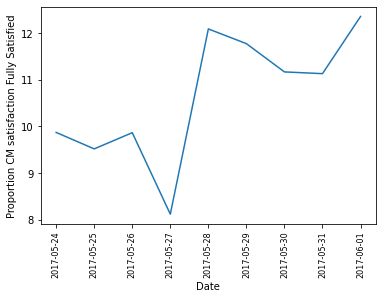

In [64]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(f_s.index,f_s/total*100)
plt.xlabel('Date')
plt.xticks(f_s.index,rotation='vertical',size=8)
plt.ylabel('Proportion CM satisfaction Fully Satisfied')
plt.show()

## 8) Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.

In [65]:
survey.pivot_table(index='Past_Vote', columns='Vote_Now', aggfunc='count')

CM_satisfaction                                              \
Vote_Now                 AAP AIMIM     BJP  BSP  HAM   INC JAP(L)  JD(U)   
Past_Vote                                                                  
BJP                      7.0   1.0  1630.0  3.0  5.0  42.0  101.0  110.0   
BSP                      NaN   1.0     2.0  5.0  NaN   1.0    NaN    NaN   
Did not vote             8.0   5.0   231.0  2.0  1.0  22.0   41.0   69.0   
HAM                      2.0   NaN    25.0  NaN  1.0   NaN    3.0    2.0   
INC                      NaN   6.0     6.0  NaN  NaN  57.0   10.0    9.0   
JAP(L)                   NaN   NaN     4.0  NaN  NaN   NaN   35.0    NaN   
JD(U)                    6.0  10.0   254.0  2.0  2.0  45.0   72.0  279.0   
LJP                      NaN   NaN    76.0  1.0  NaN   4.0    3.0    6.0   
Left Front               NaN   1.0     2.0  NaN  NaN   1.0    NaN    NaN   
NOTA                     NaN   1.0    29.0  1.0  NaN   9.0    7.0    7.0   
Others                   1.0   5.0    45.0  1.0  1.0   4.0    7.0    4.0   
RJD                      3.0   7.0    46.0  NaN  1.0  31.0   31.0   39.0   
RLSP                     NaN   NaN    17.0  NaN  NaN   NaN    3.0    NaN   
VIP                      NaN   NaN     NaN  NaN  NaN   NaN    NaN    1.0   

                               ... weight                                   \
Vote_Now       LJP Left Front  ...    LJP Left Front   NOTA Others Plurals   
Past_Vote                      ...                                           
BJP           44.0       13.0  ...   44.0       13.0  194.0   32.0    87.0   
BSP            NaN        NaN  ...    NaN        NaN    NaN    NaN     NaN   
Did not vote  10.0       16.0  ...   10.0       16.0   83.0   11.0    51.0   
HAM            2.0        NaN  ...    2.0        NaN    4.0    NaN     NaN   
INC            NaN        3.0  ...    NaN        3.0    6.0    3.0     3.0   
JAP(L)         NaN        NaN  ...    NaN        NaN    NaN    1.0     NaN   
JD(U)         29.0        9.0  ...   29.0        9.0   90.0   18.0    43.0   
LJP            9.0        2.0  ...    9.0        2.0    3.0    NaN     2.0   
Left Front     NaN       18.0  ...    NaN       18.0    1.0    1.0     NaN   
NOTA           3.0        5.0  ...    3.0        5.0   46.0    7.0    11.0   
Others         1.0        4.0  ...    1.0        4.0   10.0    6.0     8.0   
RJD            4.0        9.0  ...    4.0        9.0   18.0    8.0    10.0   
RLSP           NaN        NaN  ...    NaN        NaN    3.0    NaN     2.0   
VIP            NaN        NaN  ...    NaN        NaN    NaN    NaN     NaN   

                                                 
Vote_Now        RJD  RJJP  RLSP Undecided   VIP  
Past_Vote                                        
BJP           370.0  88.0  24.0      62.0  10.0  
BSP             NaN   NaN   NaN       NaN   NaN  
Did not vote  195.0  20.0   3.0      31.0   5.0  
HAM             6.0   4.0   NaN       1.0   NaN  
INC           100.0   1.0   2.0       7.0   NaN  
JAP(L)          2.0   NaN   NaN       NaN   NaN  
JD(U)         435.0  13.0  25.0      36.0   6.0  
LJP            17.0   1.0   NaN       1.0   NaN  
Left Front      4.0   NaN   1.0       NaN   1.0  
NOTA           27.0   5.0   4.0       5.0   NaN  
Others         21.0   7.0   1.0       6.0   NaN  
RJD           811.0   1.0  10.0      14.0   4.0  
RLSP            8.0   2.0  12.0       1.0   1.0  
VIP             NaN   NaN   NaN       NaN   1.0  

[14 rows x 234 columns]